<a href="https://colab.research.google.com/github/mahima8178/Audio-Visual-Cryptography-using-AES-RSA/blob/main/on_Audio_Files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"

In [ ]:
%cd /content/drive/My Drive/Kaggle

/content/drive/My Drive/Kaggle


**Importing dependencies**

In [ ]:
!pip install sounddevice

In [ ]:
from ctypes.util import find_library
find_library('PortAudio')

In [ ]:
!pip install pycryptodomex
from Cryptodome.Cipher import AES 

In [ ]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

import random
import string
from Cryptodome.Cipher import AES

**USING AES ALGORITHM ON AUDIO FILE**

**Taking input**

Text(0.5, 1.0, 'Original Audio Plot')

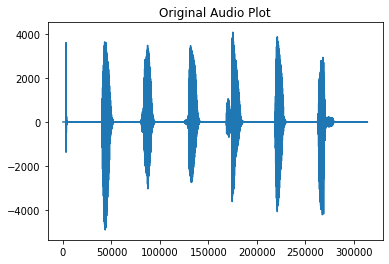

In [ ]:
fs, data = wavfile.read('Audio-encryption-and-decryption-master/Audio-encryption-and-decryption-master/audio.wav')
plt.plot(data)            # fs = sampling frequency = 44.1kHz
plt.title("Original Audio Plot")

In [ ]:
with open('Audio-encryption-and-decryption-master/Audio-encryption-and-decryption-master/audio.wav', 'rb') as fd:
    contents = fd.read()

**Getting ready with AES-KEY**

In [ ]:
AES_KEY = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(32))

AES_IV = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(16))

In [ ]:

print("AES Key is ", AES_KEY)
print("AES Initialization vector is ", AES_IV)

AES Key is  5PHmn2glCOGL0VJI8tx9XFQrqp0u7lWo
AES Initialization vector is  C8cwYykBflHmogtZ


**Encrpytion of audio file**

In [ ]:
encryptor = AES.new(AES_KEY.encode("utf-8"), AES.MODE_CFB, AES_IV.encode("utf-8"))
encrypted_audio = encryptor.encrypt(contents)

**Saving the encrypted file**

In [ ]:
with open('encrypted_audio_file.wav', 'wb') as fd:
    fd.write(encrypted_audio)
print("A file titled 'encrypted_audio_file.wav' is generated which is the encrypted audio to be communicated")

A file titled 'encrypted_audio_file.wav' is generated which is the encrypted audio to be communicated



**Loading**

In [ ]:

with open('encrypted_audio_file.wav', 'rb') as fd:
    contents = fd.read()

**Decryption of data**

In [ ]:
decryptor = AES.new(AES_KEY.encode("utf-8"), AES.MODE_CFB, AES_IV.encode("utf-8"))
decrypted_audio = decryptor.decrypt(contents)

In [ ]:
with open('decrypted_audio_file.wav', 'wb') as fd:
    fd.write(decrypted_audio)

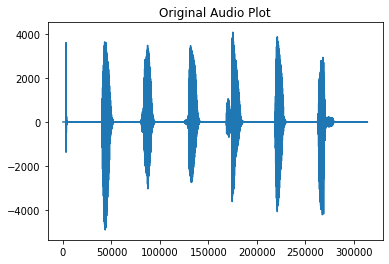

In [ ]:
fs, data = wavfile.read('decrypted_audio_file.wav')
plt.plot(data)            # fs = sampling frequency = 44.1kHz
plt.title("Original Audio Plot")
data_1 = np.asarray(data, dtype = np.int32)

**USING RSA ALGORITHM ON AUDIO FILE**

In [ ]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

**Generating public and private keys for RSA algorithm**


Select two prime no's. Suppose P = 53 and Q = 59.

Now First part of the Public key : n = P*Q = 3127.

We also need a small exponent say e : But e Must be

1) An integer.

2) Not be a factor of n.

3) 1 < e < Φ(n) [Φ(n) is discussed below], 
Let us now consider it to be equal to 3.

Our Public Key is made of n and e

1) We need to calculate Φ(n):

Such that Φ(n) = (P-1)(Q-1)     
  so,  Φ(n) = 3016


2) Now calculate Private Key, d :

d = (k*Φ(n) + 1) / e for some integer k
For k = 2, value of d is 2011.

In [ ]:
p1 = int(input("Enter a prime number: "))
p2 = int(input("Enter another prime number: "))

n = p1*p2
print("n = p1*p2 = ",n)

Enter a prime number: 3
Enter another prime number: 7
n = p1*p2 =  21


In [ ]:

e = int(input("Enter a small, odd number, co-prime with n: "))
k = int(input("Enter value of k:"))

Enter a small, odd number, co-prime with n: 1
Enter value of k:5


In [ ]:
phi = (p1-1)*(p2-1)
print("phi = ",phi)
d = int((k*phi+1)/e)
print("d= ",d)

phi =  12
d=  61


In [ ]:
public_key = n,e
private_key = n,d

print("Public Key = ", public_key)
print("Private Key = ",private_key)

Public Key =  (21, 1)
Private Key =  (21, 61)



 **Encrpytion of audio file**

Text(0.5, 1.0, 'Encrypted Audio Plot')

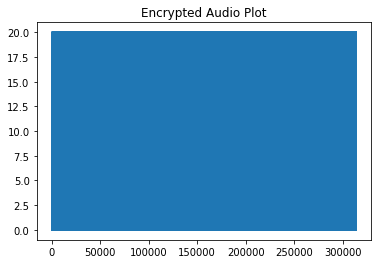

In [ ]:
encrypted = (data**e)%n
plt.plot(encrypted)
plt.title("Encrypted Audio Plot")


**Saving the saved file**

In [ ]:
encrypted = np.asarray(encrypted, dtype=np.int16)
wavfile.write('encrypted_rsa.wav', fs, encrypted)
print("A file titled 'encrypted_rsa.wav' is generated which is the encrypted audio to be communicated")

A file titled 'encrypted_rsa.wav' is generated which is the encrypted audio to be communicated


**Loading and decrypting**

Text(0.5, 1.0, 'Encrypted Audio Plot')

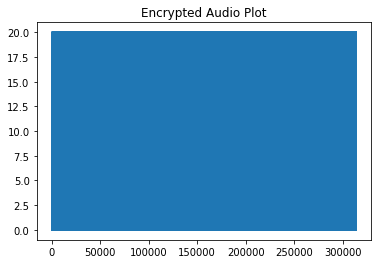

In [ ]:
fs, Data = wavfile.read('encrypted_rsa.wav')
plt.plot(Data)
plt.title("Encrypted Audio Plot")

**Decryption of data**

Text(0.5, 1.0, 'Decrypted Audio Plot')

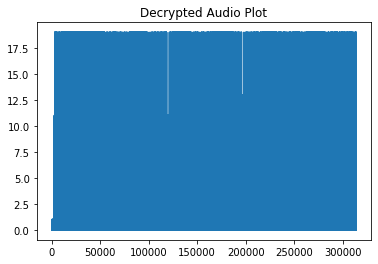

In [ ]:

decrypted = (Data**d)%n
plt.plot(decrypted)
plt.title('Decrypted Audio Plot')